# Assignment 3: Building Neural Networks and CNN
# Part III: Building a CNN [30 points]

# ACADEMIC INTERGITY STATEMENT 

I/We certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I/We did not receive any external help, coaching or contributions during the production of this work.

In [2]:
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import drive 
from tensorflow.keras.utils import to_categorical
#drive.mount('/content/gdrive')
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [3]:
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


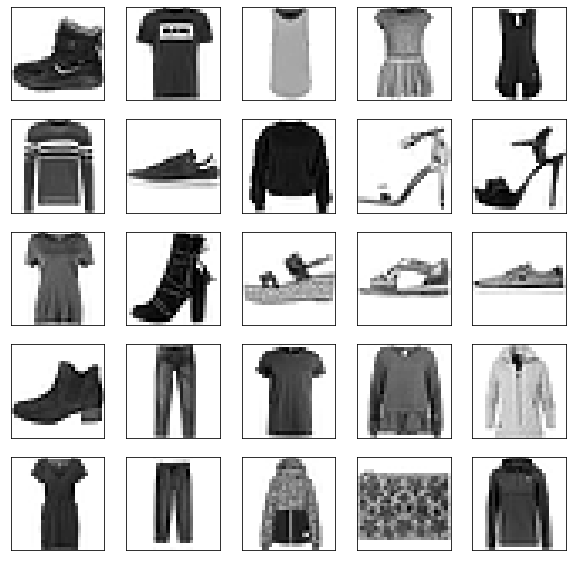

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

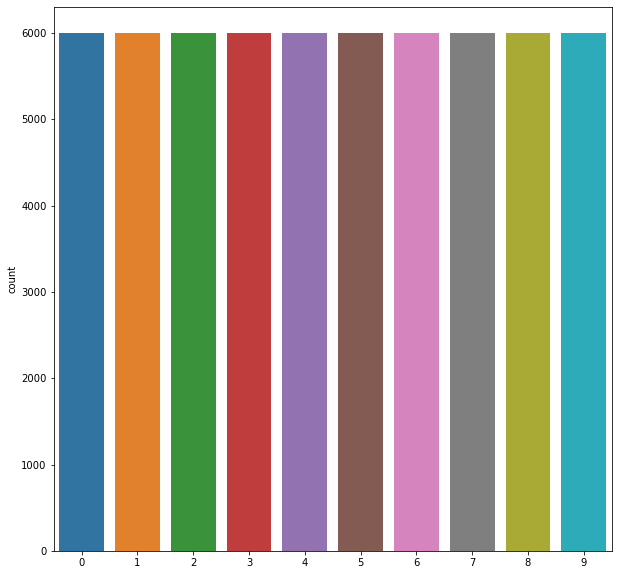

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(x = trainy)
plt.show()

In [6]:
trainX = trainX/np.float32(255)
trainy = trainy.astype(np.int32)
testX = testX/np.float32(255)
testy = testy.astype(np.int32)

testy = to_categorical(testy)
trainy = to_categorical(trainy)

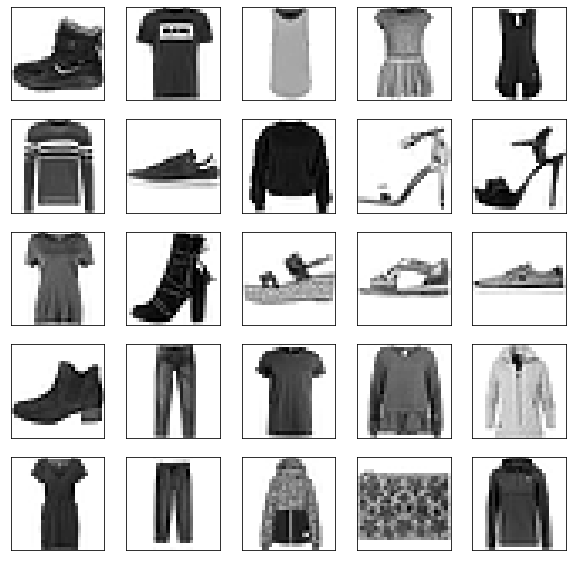

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

In [8]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.6),

        Flatten(),        
        Dense(256, activation='relu'),
#        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])    
print(model.summary())

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                      

2022-04-19 17:21:31.647107: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 17:21:31.647221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 5, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

In [11]:
cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

Epoch 1/100


2022-04-19 17:21:31.857132: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-19 17:21:32.231334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.6522

2022-04-19 17:21:48.144167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-19 17:21:50.044460: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 20s 20ms/step - loss: 1.0019 - accuracy: 0.6522 - val_loss: 0.6039 - val_accuracy: 0.7792
Epoch 2/100
938/938 [==============================] - 19s 20ms/step - loss: 0.5626 - accuracy: 0.7950 - val_loss: 0.4576 - val_accuracy: 0.8337
Epoch 3/100
938/938 [==============================] - 19s 20ms/step - loss: 0.4632 - accuracy: 0.8333 - val_loss: 0.4135 - val_accuracy: 0.8449
Epoch 4/100
938/938 [==============================] - 19s 20ms/step - loss: 0.4065 - accuracy: 0.8533 - val_loss: 0.3506 - val_accuracy: 0.8696
Epoch 5/100
938/938 [==============================] - 19s 21ms/step - loss: 0.3702 - accuracy: 0.8656 - val_loss: 0.3512 - val_accuracy: 0.8694
Epoch 6/100
938/938 [==============================] - 20s 21ms/step - loss: 0.3425 - accuracy: 0.8767 - val_loss: 0.3103 - val_accuracy: 0.8877
Epoch 7/100
938/938 [==============================] - 19s 20ms/step - loss: 0.3217 

Epoch 30/100
938/938 [==============================] - 19s 20ms/step - loss: 0.1691 - accuracy: 0.9367 - val_loss: 0.2034 - val_accuracy: 0.9270
Epoch 31/100
938/938 [==============================] - 20s 21ms/step - loss: 0.1682 - accuracy: 0.9393 - val_loss: 0.2069 - val_accuracy: 0.9260
Epoch 32/100
938/938 [==============================] - 20s 21ms/step - loss: 0.1660 - accuracy: 0.9398 - val_loss: 0.2053 - val_accuracy: 0.9263
Epoch 33/100
938/938 [==============================] - 19s 21ms/step - loss: 0.1604 - accuracy: 0.9416 - val_loss: 0.2122 - val_accuracy: 0.9251
Epoch 34/100
938/938 [==============================] - 19s 20ms/step - loss: 0.1605 - accuracy: 0.9412 - val_loss: 0.1987 - val_accuracy: 0.9302
Epoch 35/100
938/938 [==============================] - 19s 21ms/step - loss: 0.1594 - accuracy: 0.9418 - val_loss: 0.1990 - val_accuracy: 0.9300
Epoch 36/100
938/938 [==============================] - 19s 20ms/step - loss: 0.1539 - accuracy: 0.9432 - val_loss: 0.2019 -

In [12]:
model.load_weights(checkpoint_filepath)

2022-04-19 17:34:03.711916: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [13]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)

0.22759556770324707 0.9205000400543213


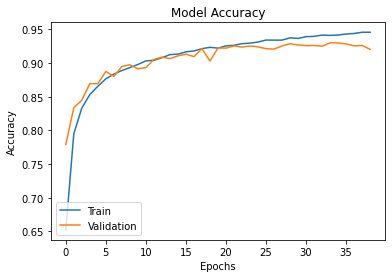

In [14]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

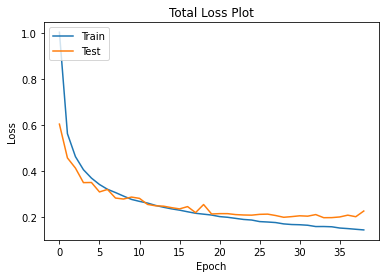

In [15]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

#Part IV: Optimizing CNN + Data Argumentation [30 points]

#Dropout Optimization

In [16]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                      

In [17]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)




Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



  1/938 [..............................] - ETA: 7:48 - loss: 2.9754 - accuracy: 0.1875

2022-04-19 17:34:05.675119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.6754 - accuracy: 0.7584

2022-04-19 17:34:22.624834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 20s 21ms/step - loss: 0.6754 - accuracy: 0.7584 - val_loss: 0.4266 - val_accuracy: 0.8429
Epoch 2/100
938/938 [==============================] - 19s 21ms/step - loss: 0.3979 - accuracy: 0.8546 - val_loss: 0.3458 - val_accuracy: 0.8732
Epoch 3/100
938/938 [==============================] - 19s 20ms/step - loss: 0.3362 - accuracy: 0.8771 - val_loss: 0.3345 - val_accuracy: 0.8757
Epoch 4/100
938/938 [==============================] - 20s 22ms/step - loss: 0.3023 - accuracy: 0.8902 - val_loss: 0.2973 - val_accuracy: 0.8916
Epoch 5/100
938/938 [==============================] - 19s 20ms/step - loss: 0.2745 - accuracy: 0.8991 - val_loss: 0.2776 - val_accuracy: 0.8960
Epoch 6/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2562 - accuracy: 0.9057 - val_loss: 0.2985 - val_accuracy: 0.8903
Epoch 7/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2422 

2022-04-19 17:37:59.679882: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [18]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)

0.2583548426628113 0.906000018119812


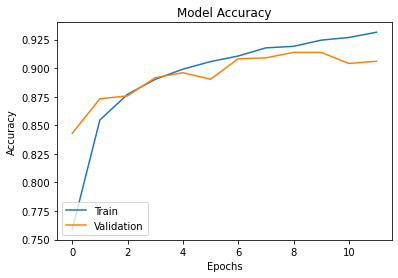

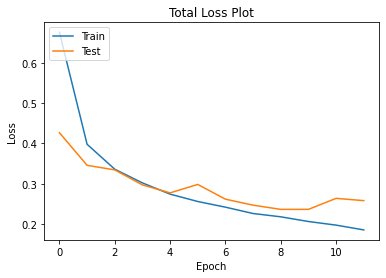

In [19]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [20]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.10),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.30),

        Flatten(),        
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                      

In [21]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)


Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-19 17:38:01.801015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.7582

2022-04-19 17:38:18.429951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 20s 21ms/step - loss: 0.6807 - accuracy: 0.7582 - val_loss: 0.4338 - val_accuracy: 0.8390
Epoch 2/100
938/938 [==============================] - 19s 21ms/step - loss: 0.4048 - accuracy: 0.8547 - val_loss: 0.3524 - val_accuracy: 0.8656
Epoch 3/100
938/938 [==============================] - 20s 21ms/step - loss: 0.3410 - accuracy: 0.8763 - val_loss: 0.3084 - val_accuracy: 0.8897
Epoch 4/100
938/938 [==============================] - 21s 22ms/step - loss: 0.3050 - accuracy: 0.8897 - val_loss: 0.2878 - val_accuracy: 0.8957
Epoch 5/100
938/938 [==============================] - 21s 22ms/step - loss: 0.2805 - accuracy: 0.8984 - val_loss: 0.2842 - val_accuracy: 0.8936
Epoch 6/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2602 - accuracy: 0.9047 - val_loss: 0.2787 - val_accuracy: 0.8965
Epoch 7/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2439 

2022-04-19 17:42:38.838471: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [22]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)


0.25049474835395813 0.9117000699043274


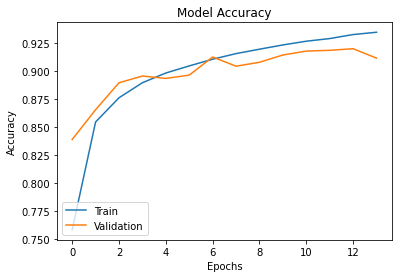

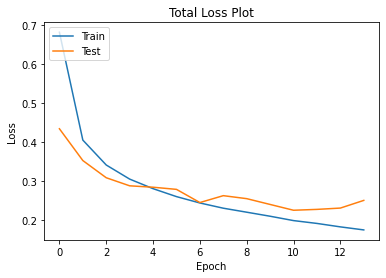

In [23]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [24]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        Flatten(),        
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                      

In [25]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)




Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-19 17:42:40.839035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.5633 - accuracy: 0.7992

2022-04-19 17:42:57.267017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 20s 21ms/step - loss: 0.5633 - accuracy: 0.7992 - val_loss: 0.3763 - val_accuracy: 0.8649
Epoch 2/100
938/938 [==============================] - 19s 21ms/step - loss: 0.3439 - accuracy: 0.8761 - val_loss: 0.3146 - val_accuracy: 0.8850
Epoch 3/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2917 - accuracy: 0.8940 - val_loss: 0.2782 - val_accuracy: 0.9011
Epoch 4/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2594 - accuracy: 0.9050 - val_loss: 0.2687 - val_accuracy: 0.9026
Epoch 5/100
938/938 [==============================] - 19s 20ms/step - loss: 0.2345 - accuracy: 0.9128 - val_loss: 0.2582 - val_accuracy: 0.9051
Epoch 6/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2131 - accuracy: 0.9217 - val_loss: 0.2569 - val_accuracy: 0.9082
Epoch 7/100
938/938 [==============================] - 19s 21ms/step - loss: 0.1975 

2022-04-19 17:46:54.370428: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [26]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)



0.23639965057373047 0.9200000166893005


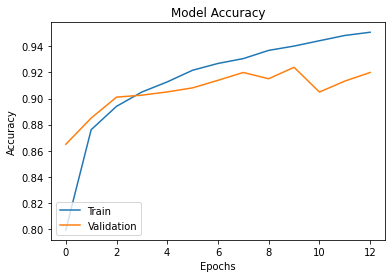

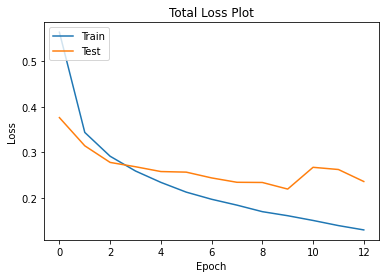

In [27]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

#Optimizer Optimization

In [28]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
#        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_24 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                      

In [29]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)


Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-19 17:46:56.368171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.7565

2022-04-19 17:47:12.995713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 20s 21ms/step - loss: 0.6852 - accuracy: 0.7565 - val_loss: 0.4356 - val_accuracy: 0.8424
Epoch 2/100
938/938 [==============================] - 19s 20ms/step - loss: 0.4060 - accuracy: 0.8538 - val_loss: 0.3556 - val_accuracy: 0.8691
Epoch 3/100
938/938 [==============================] - 20s 21ms/step - loss: 0.3424 - accuracy: 0.8758 - val_loss: 0.3267 - val_accuracy: 0.8806
Epoch 4/100
938/938 [==============================] - 20s 21ms/step - loss: 0.3067 - accuracy: 0.8880 - val_loss: 0.2992 - val_accuracy: 0.8870
Epoch 5/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2786 - accuracy: 0.8982 - val_loss: 0.2688 - val_accuracy: 0.8980
Epoch 6/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2606 - accuracy: 0.9041 - val_loss: 0.2619 - val_accuracy: 0.9038
Epoch 7/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2478 

2022-04-19 17:52:10.954774: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [30]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)



0.22155959904193878 0.9211000204086304


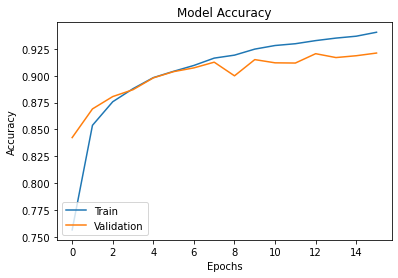

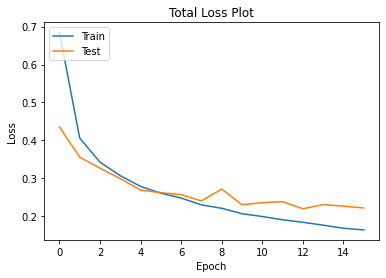

In [31]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [32]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
#        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_30 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                      

In [33]:
model.compile(optimizer='RMSprop',
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)




Epoch 1/100


2022-04-19 17:52:13.725303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.8410

2022-04-19 17:52:32.412962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 23s 23ms/step - loss: 0.4384 - accuracy: 0.8410 - val_loss: 0.3433 - val_accuracy: 0.8734
Epoch 2/100
938/938 [==============================] - 20s 22ms/step - loss: 0.2806 - accuracy: 0.8989 - val_loss: 0.2902 - val_accuracy: 0.8932
Epoch 3/100
938/938 [==============================] - 21s 22ms/step - loss: 0.2422 - accuracy: 0.9122 - val_loss: 0.2509 - val_accuracy: 0.9104
Epoch 4/100
938/938 [==============================] - 22s 23ms/step - loss: 0.2192 - accuracy: 0.9204 - val_loss: 0.2278 - val_accuracy: 0.9165
Epoch 5/100
938/938 [==============================] - 22s 23ms/step - loss: 0.2012 - accuracy: 0.9270 - val_loss: 0.2405 - val_accuracy: 0.9179
Epoch 6/100
938/938 [==============================] - 22s 23ms/step - loss: 0.1896 - accuracy: 0.9302 - val_loss: 0.2651 - val_accuracy: 0.9020
Epoch 7/100
938/938 [==============================] - 22s 23ms/step - loss: 0.1792 

2022-04-19 17:54:43.905941: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [34]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)



0.2612844705581665 0.9091000556945801


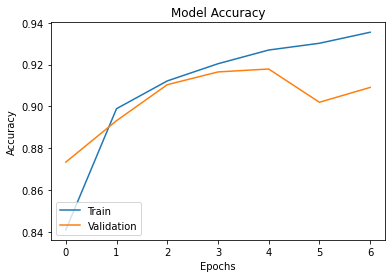

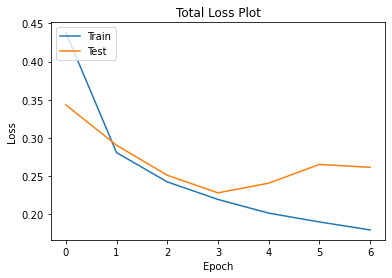

In [35]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [36]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
#        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_36 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                      

In [37]:
model.compile(optimizer='Adagrad',
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)


Epoch 1/100


2022-04-19 17:54:45.912868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.8209 - accuracy: 0.7101

2022-04-19 17:55:02.868360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 21s 21ms/step - loss: 0.8209 - accuracy: 0.7101 - val_loss: 0.5733 - val_accuracy: 0.7843
Epoch 2/100
938/938 [==============================] - 20s 21ms/step - loss: 0.5508 - accuracy: 0.7990 - val_loss: 0.5004 - val_accuracy: 0.8126
Epoch 3/100
938/938 [==============================] - 20s 21ms/step - loss: 0.4822 - accuracy: 0.8243 - val_loss: 0.4600 - val_accuracy: 0.8289
Epoch 4/100
938/938 [==============================] - 20s 21ms/step - loss: 0.4471 - accuracy: 0.8379 - val_loss: 0.4290 - val_accuracy: 0.8384
Epoch 5/100
938/938 [==============================] - 20s 21ms/step - loss: 0.4214 - accuracy: 0.8486 - val_loss: 0.4107 - val_accuracy: 0.8472
Epoch 6/100
938/938 [==============================] - 20s 22ms/step - loss: 0.4020 - accuracy: 0.8554 - val_loss: 0.4068 - val_accuracy: 0.8498
Epoch 7/100
938/938 [==============================] - 19s 21ms/step - loss: 0.3847 

Epoch 30/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2849 - accuracy: 0.8961 - val_loss: 0.3021 - val_accuracy: 0.8893
Epoch 31/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2813 - accuracy: 0.8988 - val_loss: 0.3039 - val_accuracy: 0.8879
Epoch 32/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2782 - accuracy: 0.8983 - val_loss: 0.2944 - val_accuracy: 0.8925
Epoch 33/100
938/938 [==============================] - 20s 21ms/step - loss: 0.2767 - accuracy: 0.8989 - val_loss: 0.2955 - val_accuracy: 0.8911
Epoch 34/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2759 - accuracy: 0.8998 - val_loss: 0.2930 - val_accuracy: 0.8931
Epoch 35/100
938/938 [==============================] - 19s 21ms/step - loss: 0.2718 - accuracy: 0.9002 - val_loss: 0.2973 - val_accuracy: 0.8914
Epoch 36/100
938/938 [==============================] - 20s 22ms/step - loss: 0.2704 - accuracy: 0.9021 - val_loss: 0.2942 -

2022-04-19 18:06:54.536700: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [38]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)


0.293989896774292 0.8929000496864319


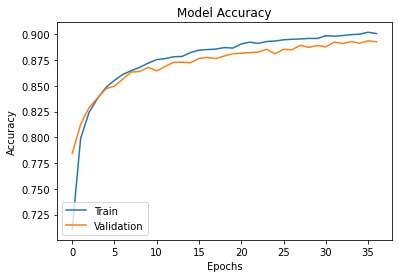

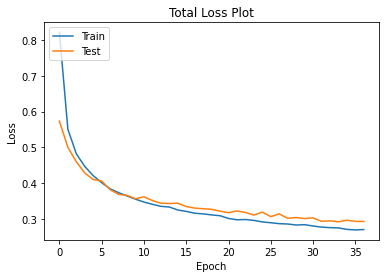

In [39]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

#Kernel Size Optimization

In [40]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
#        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_42 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_43 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                      

In [41]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)




Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-19 18:06:56.570039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.7609

2022-04-19 18:07:14.301447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 22s 22ms/step - loss: 0.6666 - accuracy: 0.7609 - val_loss: 0.4464 - val_accuracy: 0.8392
Epoch 2/100
938/938 [==============================] - 21s 23ms/step - loss: 0.3972 - accuracy: 0.8563 - val_loss: 0.3535 - val_accuracy: 0.8730
Epoch 3/100
938/938 [==============================] - 21s 22ms/step - loss: 0.3365 - accuracy: 0.8769 - val_loss: 0.3179 - val_accuracy: 0.8850
Epoch 4/100
938/938 [==============================] - 21s 23ms/step - loss: 0.2985 - accuracy: 0.8907 - val_loss: 0.2861 - val_accuracy: 0.8965
Epoch 5/100
938/938 [==============================] - 20s 22ms/step - loss: 0.2720 - accuracy: 0.9009 - val_loss: 0.2744 - val_accuracy: 0.9004
Epoch 6/100
938/938 [==============================] - 21s 22ms/step - loss: 0.2523 - accuracy: 0.9074 - val_loss: 0.2553 - val_accuracy: 0.9089
Epoch 7/100
938/938 [==============================] - 21s 23ms/step - loss: 0.2355 

2022-04-19 18:14:32.680160: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [42]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)


0.21578936278820038 0.9277000427246094


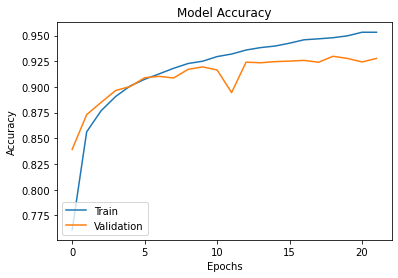

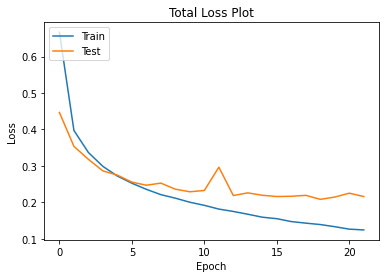

In [43]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [44]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(5, 5), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(5, 5), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 batch_normalization_48 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 batch_normalization_49 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                      

In [45]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)



Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-19 18:14:34.818903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.8019

2022-04-19 18:14:53.902073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 23s 24ms/step - loss: 0.5571 - accuracy: 0.8019 - val_loss: 0.3795 - val_accuracy: 0.8589
Epoch 2/100
938/938 [==============================] - 21s 23ms/step - loss: 0.3513 - accuracy: 0.8715 - val_loss: 0.3249 - val_accuracy: 0.8856
Epoch 3/100
938/938 [==============================] - 22s 23ms/step - loss: 0.2982 - accuracy: 0.8910 - val_loss: 0.2887 - val_accuracy: 0.8952
Epoch 4/100
938/938 [==============================] - 23s 24ms/step - loss: 0.2670 - accuracy: 0.9026 - val_loss: 0.2740 - val_accuracy: 0.8999
Epoch 5/100
938/938 [==============================] - 22s 23ms/step - loss: 0.2387 - accuracy: 0.9113 - val_loss: 0.2762 - val_accuracy: 0.9000
Epoch 6/100
938/938 [==============================] - 22s 23ms/step - loss: 0.2203 - accuracy: 0.9190 - val_loss: 0.2577 - val_accuracy: 0.9064
Epoch 7/100
938/938 [==============================] - 22s 24ms/step - loss: 0.2032 

2022-04-19 18:18:35.707178: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


0.23174969851970673 0.9200000166893005


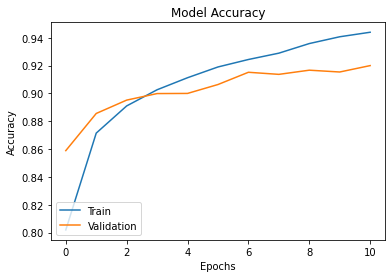

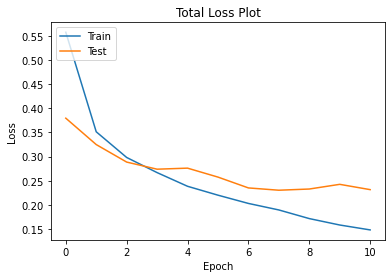

In [46]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)

import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [47]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

model = Sequential([
        Conv2D(32, kernel_size=(7, 7), activation='relu', padding='same', input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(7, 7), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(7, 7), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(7, 7), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(7, 7), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(7, 7), activation='relu', padding='same'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 28, 28, 32)        1600      
                                                                 
 batch_normalization_54 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_55 (Conv2D)          (None, 22, 22, 32)        50208     
                                                                 
 batch_normalization_55 (Bat  (None, 22, 22, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                      

In [48]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  #loss='sparse_categorical_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 3, mode='min')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

cnn_history = model.fit(trainX, trainy, epochs=100,
        batch_size=64, validation_data=(testX, testy), callbacks=[model_checkpoint, custom_early_stopping])

model.load_weights(checkpoint_filepath)



Epoch 1/100


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-19 18:18:38.060608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.8023

2022-04-19 18:19:01.395378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
938/938 [==============================] - 27s 28ms/step - loss: 0.5547 - accuracy: 0.8023 - val_loss: 0.3882 - val_accuracy: 0.8580
Epoch 2/100
938/938 [==============================] - 27s 28ms/step - loss: 0.3428 - accuracy: 0.8744 - val_loss: 0.3250 - val_accuracy: 0.8831
Epoch 3/100
938/938 [==============================] - 26s 28ms/step - loss: 0.2930 - accuracy: 0.8940 - val_loss: 0.2919 - val_accuracy: 0.8925
Epoch 4/100
938/938 [==============================] - 26s 28ms/step - loss: 0.2603 - accuracy: 0.9052 - val_loss: 0.2639 - val_accuracy: 0.9052
Epoch 5/100
938/938 [==============================] - 26s 28ms/step - loss: 0.2340 - accuracy: 0.9132 - val_loss: 0.2741 - val_accuracy: 0.9030
Epoch 6/100
938/938 [==============================] - 26s 28ms/step - loss: 0.2147 - accuracy: 0.9208 - val_loss: 0.2651 - val_accuracy: 0.9049
Epoch 7/100
938/938 [==============================] - 26s 28ms/step - loss: 0.1989 

2022-04-19 18:24:45.938356: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/checkpoint: FAILED_PRECONDITION: /tmp/checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [49]:
val_loss, val_accuracy = model.evaluate(testX, testy, batch_size = 64, verbose = 0)
print(val_loss, val_accuracy)



0.30002495646476746 0.9051000475883484


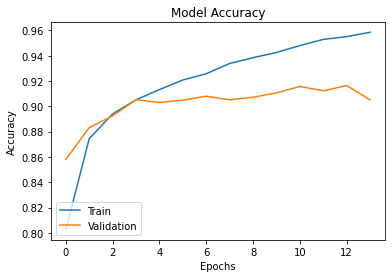

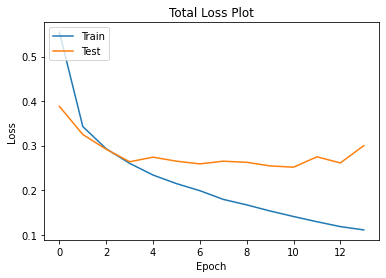

In [50]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Data Augumentation

In [52]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

#(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
#trainX = np.expand_dims(trainX, axis=-1)
trainX = trainX.reshape(-1, 28, 28, 1).astype('float') / 255.0
testX = testX.reshape(-1, 28, 28, 1).astype('float') / 255.0

# testy = to_categorical(testy)
# trainy = to_categorical(trainy)


train_datagen = ImageDataGenerator(horizontal_flip = True,vertical_flip = True,rotation_range=90,data_format =  "channels_last",
                                          zoom_range = [0.7,1.0] )
test_datagen = ImageDataGenerator()

train_generator_n_samples = train_datagen.flow(trainX, trainy, batch_size=64)
valid_generator = train_datagen.flow(trainX, trainy, batch_size=64)

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1), kernel_initializer=GlorotNormal(seed= 2)),
        BatchNormalization(),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),        
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])    
model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_60 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_61 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                     

In [53]:
adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = model.fit_generator(train_generator_n_samples, validation_data=(testX, testy),
 #steps_per_epoch=len(trainX) // batch_size,
 epochs=25)

Epoch 1/25


/Users/SachinSarsambi/Downloads/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/var/folders/dp/8pdw35bs64q5shghwj6dt87w0000gn/T/ipykernel_61228/3212193616.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_history = model.fit_generator(train_generator_n_samples, validation_data=(testX, testy),
2022-04-19 18:26:42.571271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 1.4352 - accuracy: 0.4803

2022-04-19 18:27:01.340463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 22s 22ms/step - loss: 1.4352 - accuracy: 0.4803 - val_loss: 1.1569 - val_accuracy: 0.5663
Epoch 2/25
938/938 [==============================] - 20s 21ms/step - loss: 1.0700 - accuracy: 0.6141 - val_loss: 1.0354 - val_accuracy: 0.6256
Epoch 3/25
938/938 [==============================] - 20s 21ms/step - loss: 0.9517 - accuracy: 0.6568 - val_loss: 0.9951 - val_accuracy: 0.6374
Epoch 4/25
938/938 [==============================] - 20s 21ms/step - loss: 0.8822 - accuracy: 0.6811 - val_loss: 0.9920 - val_accuracy: 0.6409
Epoch 5/25
938/938 [==============================] - 20s 21ms/step - loss: 0.8303 - accuracy: 0.7006 - val_loss: 0.8837 - val_accuracy: 0.6700
Epoch 6/25
938/938 [==============================] - 20s 21ms/step - loss: 0.7926 - accuracy: 0.7143 - val_loss: 1.0353 - val_accuracy: 0.6176
Epoch 7/25
938/938 [==============================] - 20s 21ms/step - loss: 0.7651 - accuracy: 0.7251 - val_loss: 0.7481 - val_accuracy: 0.7318
Epo

In [54]:
score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/var/folders/dp/8pdw35bs64q5shghwj6dt87w0000gn/T/ipykernel_61228/1909056500.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(valid_generator)
2022-04-19 18:35:06.325631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.6367716789245605
Test accuracy: 0.7731833457946777


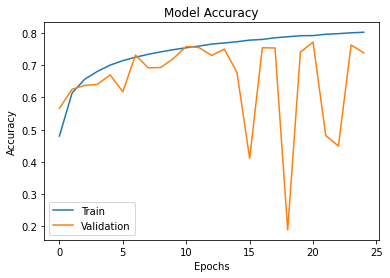

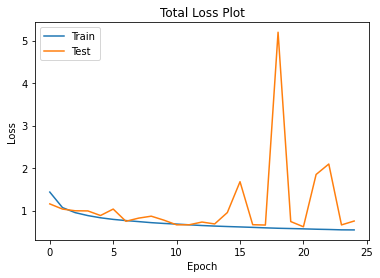

In [55]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# References
1) https://keras.io/api/ <br>
2) https://keras.io/api/models/sequential/ <br>
3) https://numpy.org/ <br>
4) https://keras.io/api/models/model_training_apis/#fit-method <br>
5) https://keras.io/api/callbacks/model_checkpoint/ <br>
6) https://keras.io/api/optimizers/ <br>
7) https://keras.io/api/layers/activations/ <br>
8) https://keras.io/api/callbacks/early_stopping/ <br>
9) https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator <br>